In [5]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [6]:
train_df = pd.read_parquet("train_full-00000-of-00001.parquet")
test_df = pd.read_parquet("test-00000-of-00001.parquet")


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96000 entries, 0 to 95999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    96000 non-null  object
 1   label   96000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [8]:
train_df.shape

(96000, 2)

In [9]:
train_df.head()

,text,label
0,Tellier clashed with owners The abrupt ousting...,2
1,Mitsubishi Buys Shares in Isuzu Motors A major...,2
2,Next Windows Is Losing Data-Storage Tool (AP) ...,3
3,"U.S., France on Top in Davis Cup Semis LONDON...",1
4,Job cuts eat into RBC #39;s Q4 earnings TORONT...,2


In [10]:
train_df.isnull().sum()

text     0
label    0
dtype: int64

In [11]:
train_df.describe()

,label
count,96000.00000
mean,1.50000
std,1.11804
min,0.00000
25%,0.75000
50%,1.50000
75%,2.25000
max,3.00000


In [12]:
df = pd.concat([train_df, test_df], ignore_index=True)



In [14]:
X = df['text']       
y = df['label']      

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [15]:
vectorizer = TfidfVectorizer(max_features=5000) 

X_train_tfidf = vectorizer.fit_transform(X_train)  
X_test_tfidf = vectorizer.transform(X_test)        


In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train_tfidf, y_train)

LinearRegression()

In [25]:
y_pred1 = lr_model.predict(X_test_tfidf)


In [32]:
sample_news = ["Apple releases new iPhone with advanced features"]
sample_vector = vectorizer.transform(sample_news)
prediction = lr_model.predict(sample_vector)
print("Predicted Category:", prediction[0])


Predicted Category: 2.408891432476429


In [34]:
lr_mae = mean_absolute_error(y_test, y_pred1)
lr_mse = mean_squared_error(y_test, y_pred1)
lr_r2 = r2_score(y_test, y_pred1)

print("Linear Regression Results")
print("MAE:", lr_mae)
print("MSE:", lr_mse)
print("R2:", lr_r2)

Linear Regression Results
MAE: 0.3984921067400878
MSE: 0.3208407371176626
R2: 0.7418522799962397


In [36]:
y_pred_classes = np.round(y_pred1).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


Accuracy: 0.7295849420849421
Confusion Matrix:
 [[   0    0    0    0    0    0    0]
 [ 205 3109 1546  255   28    0    0]
 [   0  122 4754  341    1    0    0]
 [   1   25  614 4160  411    5    0]
 [   0   19  222 1632 3094  175    1]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.95      0.60      0.74      5143
           1       0.67      0.91      0.77      5218
           2       0.65      0.80      0.72      5216
           3       0.88      0.60      0.71      5143
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.73     20720
   macro avg       0.45      0.42      0.42     20720
weighted avg       0.78      0.73      0.73     20720



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [67]:
y_pred2 = rf_model.predict(X_test_tfidf)
sample_news = ["New football club wins the tournament"]
sample_vector = vectorizer.transform(sample_news)
prediction = rf_model.predict(sample_vector)
print("Predicted Category:", prediction[0])


Predicted Category: 1


In [69]:
y_pred_classes = np.round(y_pred2).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


Accuracy: 0.8688223938223938
Confusion Matrix:
 [[4465  256  228  194]
 [  89 4994   57   78]
 [ 251  161 4273  531]
 [ 261  196  416 4270]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5143
           1       0.89      0.96      0.92      5218
           2       0.86      0.82      0.84      5216
           3       0.84      0.83      0.84      5143

    accuracy                           0.87     20720
   macro avg       0.87      0.87      0.87     20720
weighted avg       0.87      0.87      0.87     20720



In [71]:
rf_mae = mean_absolute_error(y_test, y_pred2)
rf_mse = mean_squared_error(y_test, y_pred2)
rf_r2 = r2_score(y_test, y_pred2)

print("Random Forest Results")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("R2:", rf_r2)

Random Forest Results
MAE: 0.21143822393822395
MSE: 0.4158783783783784
R2: 0.665385212171895


In [74]:
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

In [82]:
y_pred3 = svm_model.predict(X_test_tfidf)
sample_news = ["New research found that satellites were not found"]
sample_vector = vectorizer.transform(sample_news)
prediction = rf_model.predict(sample_vector)
print("Predicted Category:", prediction[0])


Predicted Category: 3


In [84]:
svm_mae = mean_absolute_error(y_test, y_pred3)
svm_mse = mean_squared_error(y_test, y_pred3)
svm_r2 = r2_score(y_test, y_pred3)

print("Support Vector Machine Results")
print("MAE:", svm_mae)
print("MSE:", svm_mse)
print("R2:", svm_r2)

Support Vector Machine Results
MAE: 0.14792471042471042
MSE: 0.2930984555984556
R2: 0.764173655973067


In [86]:
y_pred_classes = np.round(y_pred3).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


Accuracy: 0.9082528957528958
Confusion Matrix:
 [[4620  145  227  151]
 [  61 5093   31   33]
 [ 166   53 4559  438]
 [ 189   58  349 4547]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5143
           1       0.95      0.98      0.96      5218
           2       0.88      0.87      0.88      5216
           3       0.88      0.88      0.88      5143

    accuracy                           0.91     20720
   macro avg       0.91      0.91      0.91     20720
weighted avg       0.91      0.91      0.91     20720



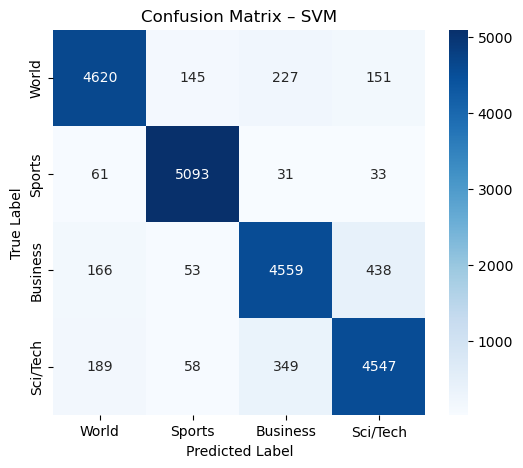

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_svm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["World", "Sports", "Business", "Sci/Tech"],
    yticklabels=["World", "Sports", "Business", "Sci/Tech"]
)

plt.title("Confusion Matrix – SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


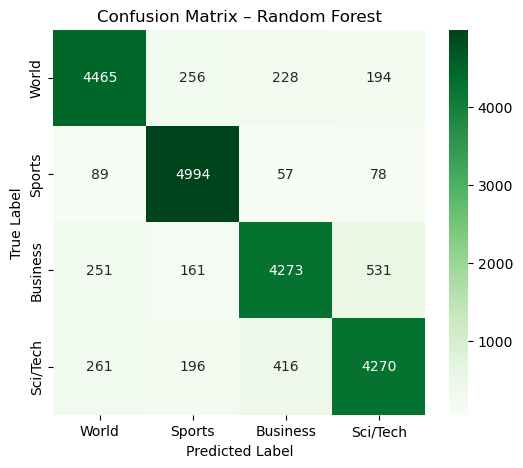

In [92]:
cm_rf = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["World", "Sports", "Business", "Sci/Tech"],
    yticklabels=["World", "Sports", "Business", "Sci/Tech"]
)

plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
